In [1]:
from cribbage import *

In [2]:
import numpy as np

In [3]:
def generate_4scores():
    while True:
        h = make_random_hand()
        yield score_hand(h)

In [4]:
import itertools
samples = np.array(list(itertools.islice(generate_4scores(), 100000)))

In [5]:
%matplotlib inline

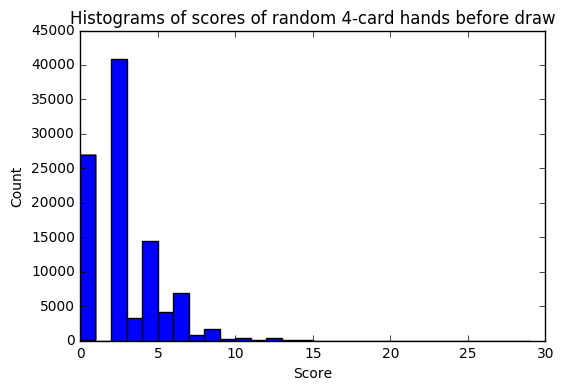

In [6]:
from matplotlib import pyplot as plt
plt.hist(samples, 29, (0,29))
plt.title('Histograms of scores of random 4-card hands before draw')
plt.xlabel('Score')
plt.ylabel('Count')

In [7]:
from collections import Counter
Counter(samples)

Counter({0: 26913,
         2: 40794,
         3: 3279,
         4: 14434,
         5: 4182,
         6: 6870,
         7: 821,
         8: 1632,
         9: 255,
         10: 347,
         11: 13,
         12: 425,
         13: 3,
         14: 32})

Counter({0: 38823,
         1: 3874,
         2: 108227,
         3: 19468,
         4: 109672,
         5: 26764,
         6: 69375,
         7: 28914,
         8: 43761,
         9: 13860,
         10: 15130,
         11: 1910,
         12: 12237,
         13: 767,
         14: 3535,
         15: 320,
         16: 2245,
         17: 425,
         18: 103,
         20: 314,
         21: 95,
         22: 12,
         23: 22,
         24: 144,
         28: 3})

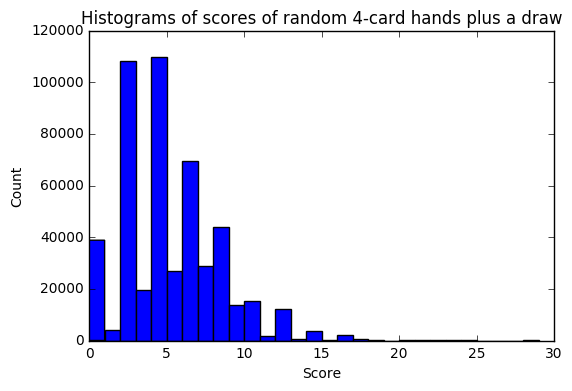

In [8]:
def generate_5scores():
    while True:
        h, d = make_random_hand_and_draw()
        yield score_hand(h, d)
samples5 = np.array(list(itertools.islice(generate_5scores(), 500000)))
plt.hist(samples5, 29, (0,29))
plt.title('Histograms of scores of random 4-card hands plus a draw')
plt.xlabel('Score')
plt.ylabel('Count')
Counter(samples5)

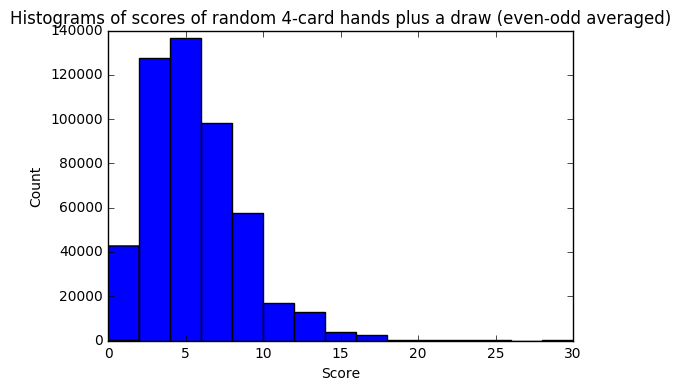

In [9]:
plt.hist(samples5, 15, (0,30))
plt.title('Histograms of scores of random 4-card hands plus a draw (even-odd averaged)')
plt.xlabel('Score')
plt.ylabel('Count')

In [14]:
%timeit h,d = make_random_hand_and_draw() ; score_hand(h,d)

The slowest run took 12.19 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 58.4 µs per loop


In [25]:
import c_cribbage_score
%timeit h,d = make_random_hand_and_draw() ; c_cribbage_score.score_hand(h,d)

The slowest run took 4.97 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 9.26 µs per loop


In [ ]:
for x in range(1000000):
    h,d = make_random_hand_and_draw()
    if score_hand(h,d) != c_cribbage_score.score_hand(h,d):
        print 'hand', ', '.join([print_card(v) for v in h])
        print 'draw', print_card(d)
        print 'C code score:', c_cribbage_score.score_hand(h,d)
        score_hand(h, d, verbose=True)

In [20]:
h,d = make_random_hand_and_draw()
%timeit score_hand(h,d)

10000 loops, best of 3: 40.3 µs per loop


In [26]:
%timeit c_cribbage_score.score_hand(h,d)

The slowest run took 16.24 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 308 ns per loop


In [22]:
%timeit h,d = make_random_hand_and_draw()

100000 loops, best of 3: 8.83 µs per loop


In [27]:
import cribbage
reload(cribbage)
reload(c_cribbage_score)

<module 'c_cribbage_score' from 'c_cribbage_score.so'>